## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
# Reading the data

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the shape of the dataframe
df.shape

(730, 16)

In [4]:
# checking the distributions of columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# get the data types of columns


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking for the null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# renaming columns for readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Checking for duplicates

df.shape == df.drop_duplicates().shape


True

#### As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [9]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which is covered by year and month column,
# casual and registered are parts of cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
# Encoding/mapping the season column

df.season = df.season.apply(lambda x:
    {
        1:'spring',
        2:'summer',
        3:'fall', 
        4:'winter'
    }[int(x)]
)

In [11]:
# Encoding/mapping the month column

df.month = df.month.apply(lambda x:
    {
        1:'jan',
        2:'feb',
        3:'mar',
        4:'apr',
        5:'may',
        6:'june',
        7:'july',
        8:'aug',
        9:'sep',
        10:'oct',
        11:'nov',
        12:'dec'
    }[int(x)]
)

In [12]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.apply(lambda x:
    {
        0:'sun',
        1:'mon',
        2:'tue',
        3:'wed',
        4:'thu',
        5:'fri',
        6:'sat'
    }[int(x)]
)

In [13]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.apply(lambda x:
    {
        1:'Clear',
        2:'Misty',
        3:'Light_snowrain',
        4:'Heavy_snowrain'
    }[int(x)]
)

In [14]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

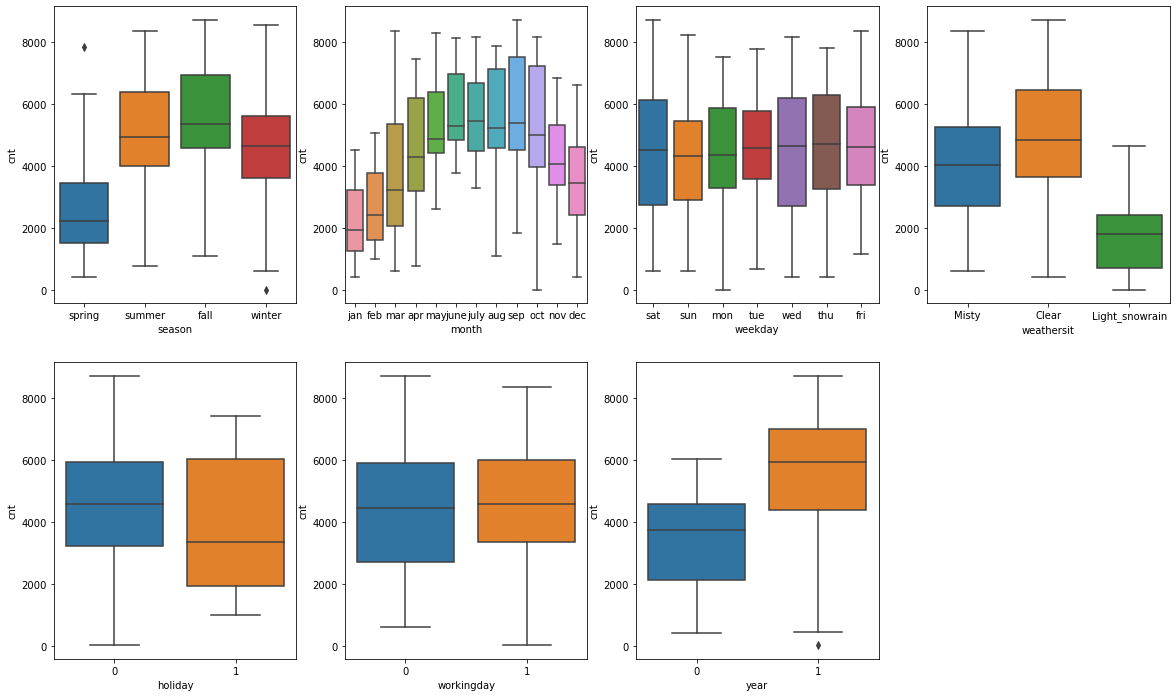

In [16]:
# Analysing the categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [17]:
# function to plot barplot for columns

def plot_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt', data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt', data=df, hue='year',palette='Blues')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


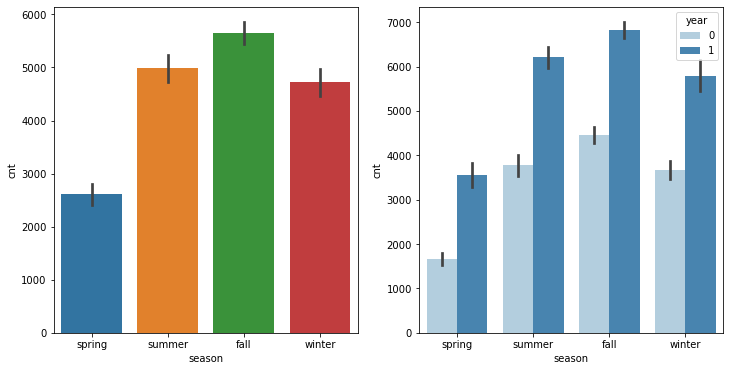

In [18]:
# plotting season column

plot_columns('season')

Fall season seems to have more booking. And, in all seasons the booking count has increased a lot from 2018 to 2019.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


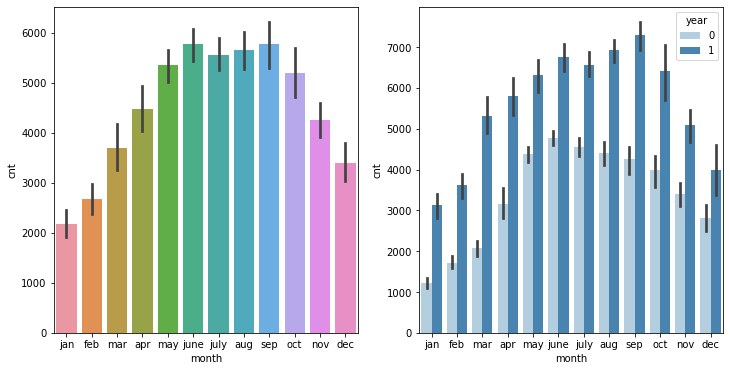

In [19]:
# plotting month column

plot_columns('month')

Most of the bookings has been from may to oct. Trend seems to be correlated to season, which is reasonable as most months are part of a certain season.
Number of booking for each month has increased from 2018 to 2019.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


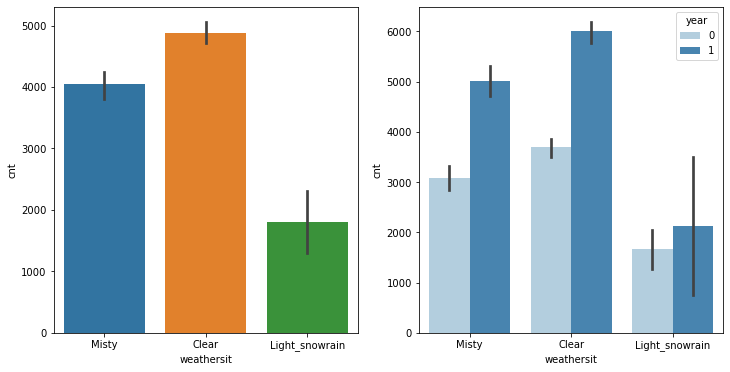

In [20]:
# plotting weathersit column

plot_columns('weathersit')

Clear weather attracted more booking which is obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


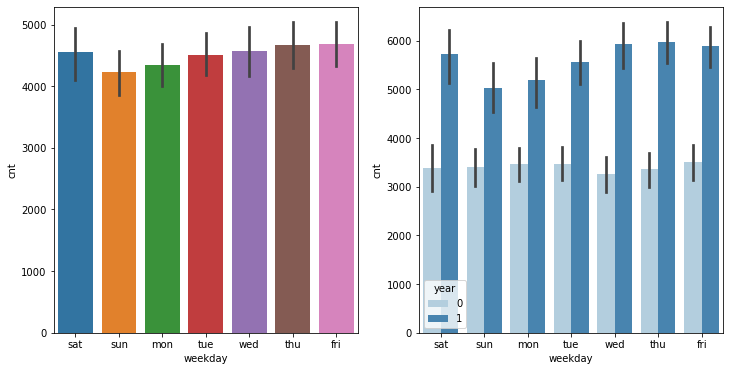

In [21]:
# plotting weekday column

plot_columns('weekday')

No very obvious trend here. Slightly low on sunday after highs on friday and saturday makes sense as people like to take a day for resting, staying at home after a fun weekend.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


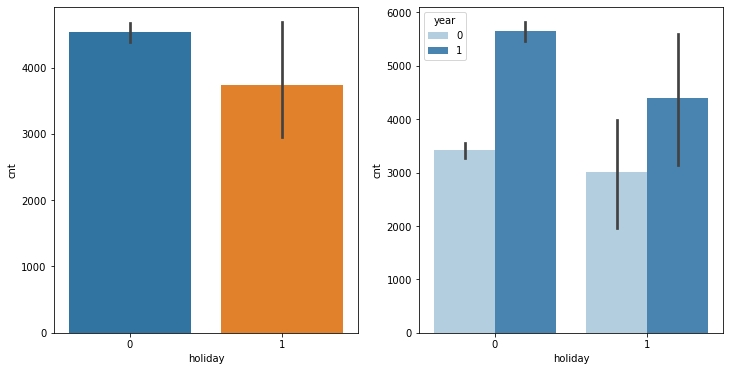

In [22]:
# plotting holiday column

plot_columns('holiday')

On holidays, booking seems to be less in number which seems reasonable as on other days people might use the service to get to their schools/ colleges etc

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


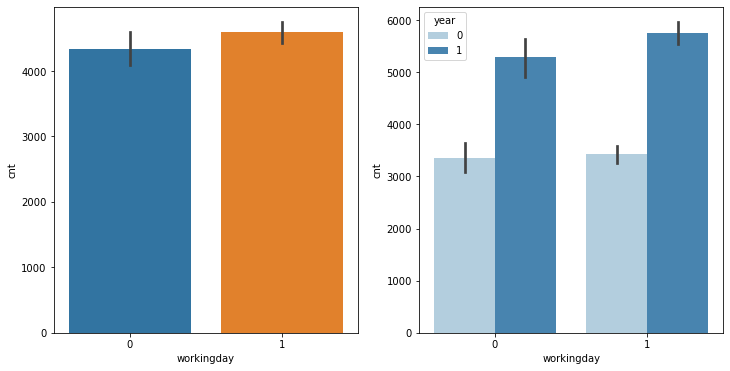

In [23]:
# plotting workingday column

plot_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day which makes sense because most working professionals would generally have their personal vehicle. But, the count increased from 2018 to 2019.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


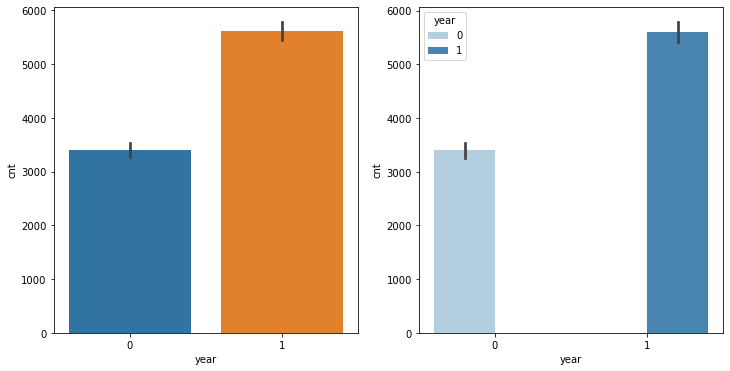

In [24]:
# plotting year column

plot_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

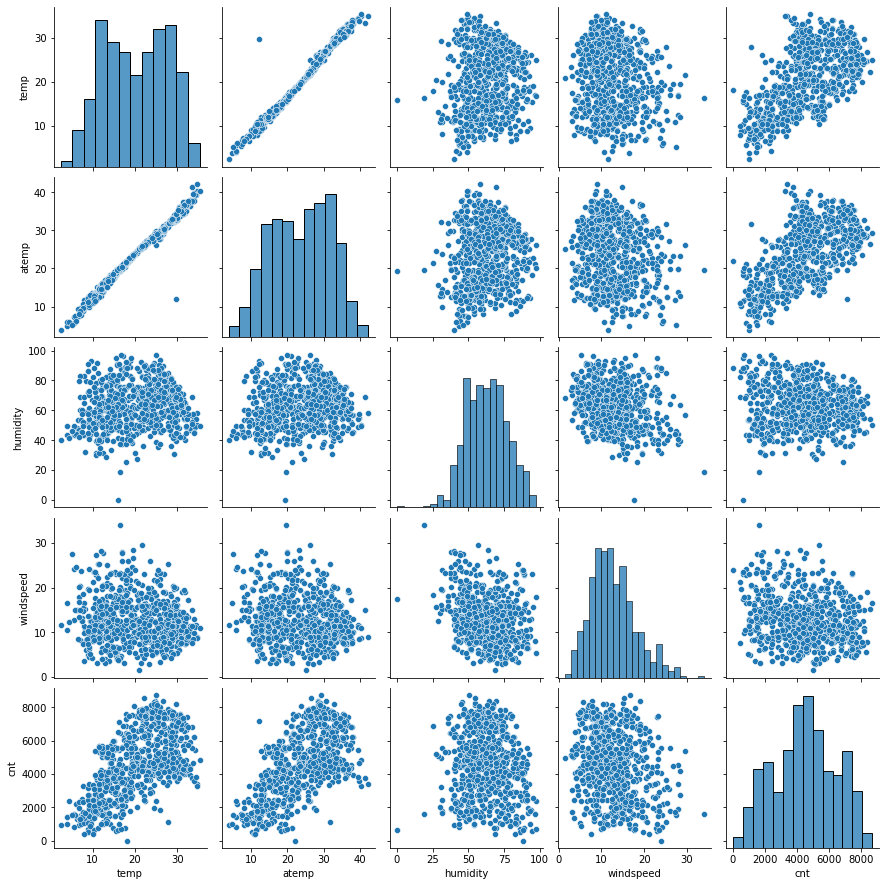

In [25]:
# Analysing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

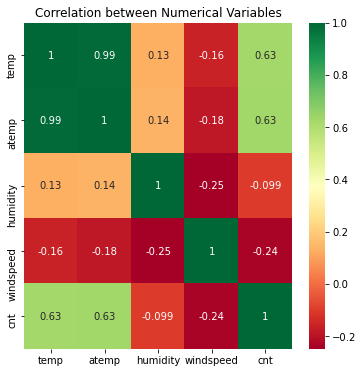

In [26]:
# Plotting the correlation between the numerical variables

plt.figure(figsize = (6,6))
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

#### There is a very obvious linear relationship between temp and atemp. Both of the parameters shouldn't be used in the model due to multicolinearity. Will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Data Preparation

In [27]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [28]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [30]:
# dropping these columns, we have created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
# check the shape of new dataframe

df_new.shape

(730, 30)

In [33]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

In [34]:
# splitting the dataframe into Train and Test

np.random.seed(17)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 13)

In [35]:
# check the shape of training and test datatset

df_train.shape, df_test.shape

((510, 30), (220, 30))

In [36]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [37]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-37-41efa4ea6872>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


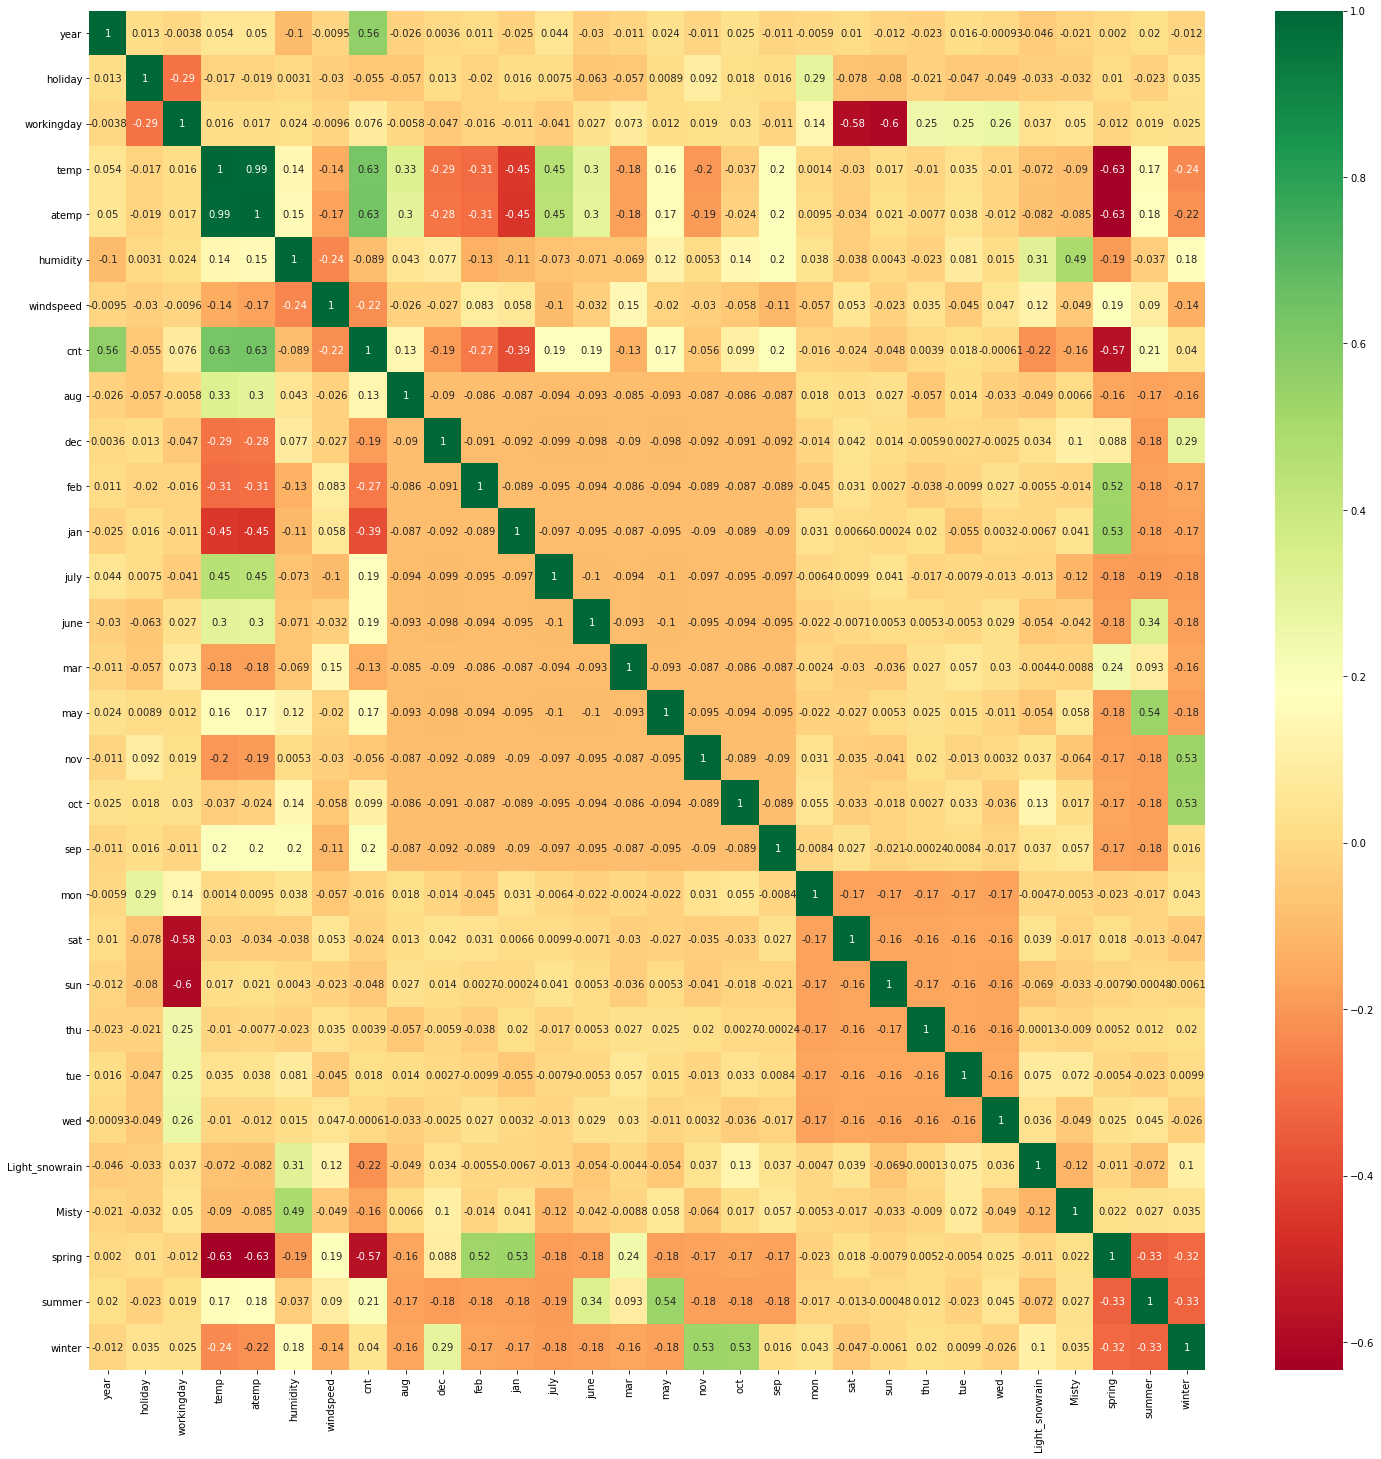

In [38]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

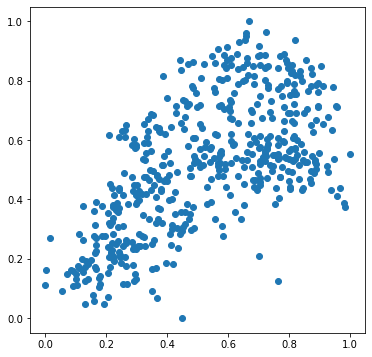

In [39]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [40]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [41]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [42]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 2),
 ('feb', False, 6),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 10),
 ('mar', False, 15),
 ('may', False, 13),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 11),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', False, 3),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [43]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'nov', 'sep', 'sat', 'sun', 'Light_snowrain', 'spring',
       'summer', 'winter'],
      dtype='object')


In [44]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'oct', 'mon',
       'thu', 'tue', 'wed', 'Misty'],
      dtype='object')

In [45]:
# Function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [46]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [47]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,42.01
10,sun,9.52
9,sat,8.68
12,spring,5.25
3,temp,3.71
14,winter,3.58
1,holiday,3.32
13,summer,2.74
6,july,1.72
7,nov,1.49


## Step 5: Building a linear model

In [48]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.8
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          1.23e-177
Time:                        13:56:40   Log-Likelihood:                 496.71
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     495   BIC:                            -899.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2484      0.026      9.589      0.000       0.198       0.299
year               0.2236      0.008     26.854      0.000       0.207       0.240
holiday            0.0188      0.019      0.997      0.319      -0.018       0.056
workingday         0.0936      0.009     10.122      0.000       0.075       0.112
temp               0.4809      0.033     14.702      0.000       0.417       0.545
humidity          -0.2358      0.027     -8.891      0.000      -0.288      -0.184
windspeed         -0.1700      0.028     -6.008      0.000      -0.226      -0.114
july              -0.0544      0.018     -2.945      0.003      -0.091      -0.018
nov               -0.0395      0.018     -2.168      0.031      -0.075      -0.004
sep                0.0797      0.017      4.588      0.000       0.046       0.114
sat                0.0833      0.012      7.137      0.000       0.060       0.106
sun                0.0529      0.012      4.456      0.000       0.030       0.076
Light_snowrain    -0.1389      0.028     -5.043      0.000      -0.193      -0.085
spring            -0.0840      0.022     -3.817      0.000      -0.127      -0.041
summer             0.0524      0.015      3.382      0.001       0.022       0.083
winter             0.0998      0.018      5.477      0.000       0.064       0.136
==============================================================================
Omnibus:                       70.381   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.211
Skew:                          -0.825   Prob(JB):                     3.92e-28
Kurtosis:                       4.794   Cond. No.                     1.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,11.96
2,temp,11.45
4,windspeed,5.94
11,spring,3.40
13,winter,3.13
12,summer,2.74
0,year,2.01
5,july,1.85
6,nov,1.58
7,sep,1.44


In [50]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.97
3,windspeed,5.87
11,summer,2.43
10,spring,2.28
12,winter,2.25
0,year,2.00
4,july,1.85
5,nov,1.58
6,sep,1.39
8,sun,1.21


VIF values seems to be good now. But we will see if we can reduce further ?

In [51]:
# Building linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     150.9
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          6.74e-163
Time:                        13:56:41   Log-Likelihood:                 458.93
No. Observations:                 510   AIC:                            -889.9
Df Residuals:                     496   BIC:                            -830.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2195      0.031      7.017      0.000       0.158       0.281
year               0.2317      0.009     26.030      0.000       0.214       0.249
holiday           -0.0770      0.024     -3.255      0.001      -0.123      -0.031
temp               0.4325      0.035     12.463      0.000       0.364       0.501
windspeed         -0.1065      0.029     -3.615      0.000      -0.164      -0.049
july              -0.0349      0.020     -1.772      0.077      -0.074       0.004
nov               -0.0309      0.020     -1.579      0.115      -0.069       0.008
sep                0.0624      0.019      3.358      0.001       0.026       0.099
sat               -0.0079      0.013     -0.596      0.551      -0.034       0.018
sun               -0.0433      0.013     -3.358      0.001      -0.069      -0.018
Light_snowrain    -0.2263      0.028     -8.176      0.000      -0.281      -0.172
spring            -0.0953      0.024     -4.035      0.000      -0.142      -0.049
summer             0.0462      0.017      2.775      0.006       0.013       0.079
winter             0.0767      0.019      3.955      0.000       0.039       0.115
==============================================================================
Omnibus:                       80.449   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.034
Skew:                          -0.898   Prob(JB):                     2.16e-34
Kurtosis:                       5.018   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.95
3,windspeed,5.82
10,summer,2.43
9,spring,2.27
11,winter,2.25
0,year,2.00
4,july,1.85
5,nov,1.58
6,sep,1.38
7,sun,1.18


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [53]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          6.15e-164
Time:                        13:56:41   Log-Likelihood:                 458.75
No. Observations:                 510   AIC:                            -891.5
Df Residuals:                     497   BIC:                            -836.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2170      0.031      7.006      0.000       0.156       0.278
year               0.2316      0.009     26.041      0.000       0.214       0.249
holiday           -0.0758      0.024     -3.217      0.001      -0.122      -0.030
temp               0.4343      0.035     12.574      0.000       0.366       0.502
windspeed         -0.1073      0.029     -3.647      0.000      -0.165      -0.049
july              -0.0351      0.020     -1.783      0.075      -0.074       0.004
nov               -0.0306      0.020     -1.565      0.118      -0.069       0.008
sep                0.0622      0.019      3.350      0.001       0.026       0.099
sun               -0.0420      0.013     -3.307      0.001      -0.067      -0.017
Light_snowrain    -0.2266      0.028     -8.191      0.000      -0.281      -0.172
spring            -0.0943      0.024     -4.004      0.000      -0.141      -0.048
summer             0.0467      0.017      2.815      0.005       0.014       0.079
winter             0.0776      0.019      4.016      0.000       0.040       0.116
==============================================================================
Omnibus:                       82.180   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.074
Skew:                          -0.916   Prob(JB):                     4.73e-35
Kurtosis:                       5.021   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.93
3,windspeed,5.76
9,summer,2.42
8,spring,2.26
0,year,2.00
4,july,1.85
10,winter,1.75
5,sep,1.37
6,sun,1.18
7,Light_snowrain,1.07


In [55]:
# Building 3rd linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     177.8
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          1.52e-164
Time:                        13:56:41   Log-Likelihood:                 457.49
No. Observations:                 510   AIC:                            -891.0
Df Residuals:                     498   BIC:                            -840.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2093      0.031      6.836      0.000       0.149       0.270
year               0.2315      0.009     25.989      0.000       0.214       0.249
holiday           -0.0791      0.023     -3.368      0.001      -0.125      -0.033
temp               0.4434      0.034     13.005      0.000       0.376       0.510
windspeed         -0.1096      0.029     -3.725      0.000      -0.167      -0.052
july              -0.0347      0.020     -1.759      0.079      -0.073       0.004
sep                0.0659      0.018      3.576      0.000       0.030       0.102
sun               -0.0412      0.013     -3.241      0.001      -0.066      -0.016
Light_snowrain    -0.2250      0.028     -8.128      0.000      -0.279      -0.171
spring            -0.0880      0.023     -3.789      0.000      -0.134      -0.042
summer             0.0498      0.017      3.017      0.003       0.017       0.082
winter             0.0712      0.019      3.765      0.000       0.034       0.108
==============================================================================
Omnibus:                       77.084   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.508
Skew:                          -0.884   Prob(JB):                     1.87e-31
Kurtosis:                       4.880   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,5.76
2,temp,4.25
7,spring,2.16
0,year,1.99
8,summer,1.91
9,winter,1.56
4,sep,1.21
5,sun,1.18
6,Light_snowrain,1.07
1,holiday,1.05


In [57]:
# Building 3rd linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          4.93e-165
Time:                        13:56:42   Log-Likelihood:                 455.91
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     499   BIC:                            -843.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2028      0.030      6.657      0.000       0.143       0.263
year               0.2308      0.009     25.882      0.000       0.213       0.248
holiday           -0.0805      0.024     -3.419      0.001      -0.127      -0.034
temp               0.4323      0.034     12.876      0.000       0.366       0.498
windspeed         -0.1073      0.029     -3.644      0.000      -0.165      -0.049
sep                0.0774      0.017      4.479      0.000       0.043       0.111
sun               -0.0420      0.013     -3.298      0.001      -0.067      -0.017
Light_snowrain    -0.2266      0.028     -8.172      0.000      -0.281      -0.172
spring            -0.0790      0.023     -3.478      0.001      -0.124      -0.034
summer             0.0627      0.015      4.227      0.000       0.034       0.092
winter             0.0814      0.018      4.508      0.000       0.046       0.117
==============================================================================
Omnibus:                       76.691   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.993
Skew:                          -0.888   Prob(JB):                     1.08e-30
Kurtosis:                       4.827   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 194.5 (which is greater than 1) and the p-value of 4.93e-165 i.e almost equals to zero, states that the overall model is significant

In [58]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.202808
year              0.230799
holiday          -0.080452
temp              0.432263
windspeed        -0.107304
sep               0.077398
sun              -0.041994
Light_snowrain   -0.226606
spring           -0.078983
summer            0.062679
winter            0.081391
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [59]:
X_train_lm_5

,const,year,holiday,temp,windspeed,sep,sun,Light_snowrain,spring,summer,winter
460,1.0,1,0,0.400984,0.573104,0,0,0,0,1,0
161,1.0,0,0,0.821384,0.273070,0,0,0,0,1,0
142,1.0,0,0,0.699403,0.435916,0,0,0,0,1,0
320,1.0,0,0,0.320391,0.583358,0,0,0,0,0,1
210,1.0,0,0,0.924851,0.301286,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
153,1.0,0,0,0.684155,0.475661,0,0,0,0,1,0
528,1.0,1,0,0.730987,0.661526,0,0,0,0,1,0
74,1.0,0,0,0.351169,0.372575,0,0,0,1,0,0
176,1.0,0,0,0.762572,0.148724,0,1,0,0,0,0


In [60]:
y_train_pred = lr_5.predict(X_train_lm_5)

#### Normality of error terms

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

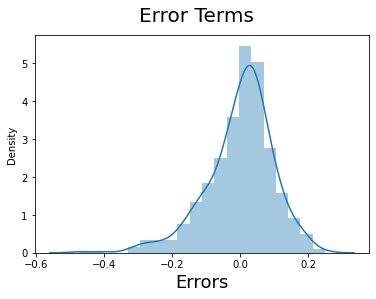

In [61]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

#### Multi Colinearity

In [62]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,5.76
2,temp,4.25
7,spring,2.16
0,year,1.99
8,summer,1.91
9,winter,1.56
4,sep,1.21
5,sun,1.18
6,Light_snowrain,1.07
1,holiday,1.05


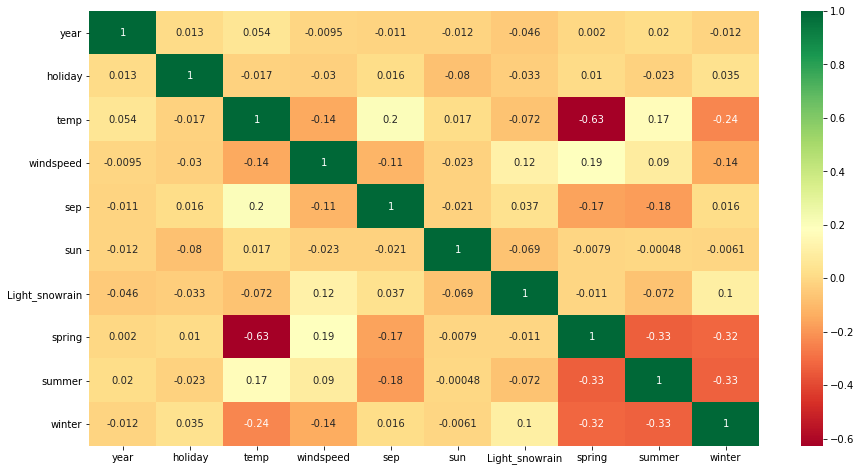

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are around 5 which is good and also there is not much multicolinearity as seen from the heatmap.

#### Linearity 

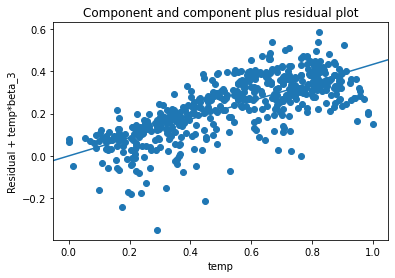

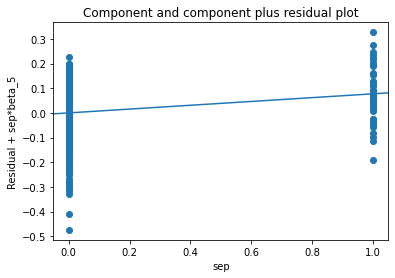

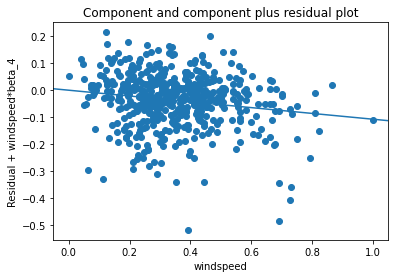

In [64]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

#### Homoscedasticity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


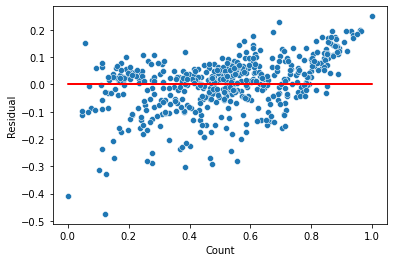

In [65]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### Independence of residuals

Durbin-Watson value of final model lr_5 is 1.966, which signifies there is no autocorrelation.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [66]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

<ipython-input-66-8cfa34762436>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
114,0,0,1,0.666730,0.641003,0.760086,0.335912,0.466061,0,0,...,0,0,0,0,0,0,0,0,1,0
260,0,0,0,0.537125,0.527854,0.654653,0.321790,0.489185,0,0,...,0,1,0,0,0,0,0,0,0,0
58,0,0,1,0.406134,0.406005,0.888797,0.551041,0.163829,0,0,...,0,0,0,0,0,0,1,1,0,0
294,0,0,0,0.426035,0.440199,0.569661,0.144876,0.493097,0,0,...,1,0,0,0,0,0,0,0,0,1
511,1,0,0,0.775641,0.731192,0.657342,0.397425,0.755752,0,0,...,0,1,0,0,0,0,0,0,1,0


In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [69]:
y_pred = lr_5.predict(X_test_lm_5)

In [70]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8155

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

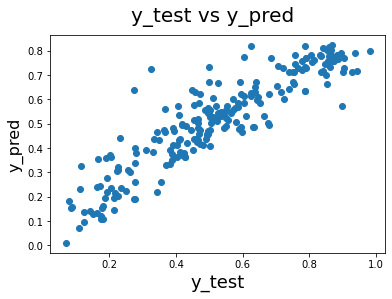

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [72]:
round(lr_5.params,4)

const             0.2028
year              0.2308
holiday          -0.0805
temp              0.4323
windspeed        -0.1073
sep               0.0774
sun              -0.0420
Light_snowrain   -0.2266
spring           -0.0790
summer            0.0627
winter            0.0814
dtype: float64

In [73]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8067


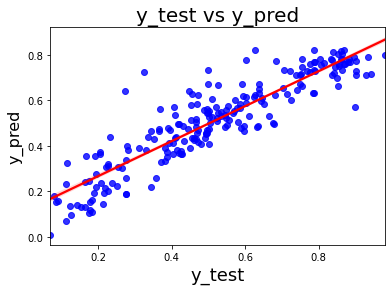

In [74]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.796
    - Test dataset R^2           : 0.8155
    - Train dataset Adjusted R^2 : 0.792    
    - Test dataset Adjusted R^2  : 0.8067